## 데이터 시각화

- pandas, matplotlib, seaborn 등 다양한 라이브러리 활용
- 데이터를 시각적으로 표현하여 패턴, 이상치를 쉽게 파악
- 라이브러리 별 특징
  - pandas: 빠른 탐색, 간단한 시각화 처리
  - matplotlib: 자유도가 높고, 세밀한 그래프 제작 가능
  - seaborn: 깔끔하고 직관적인 기본 시각화 스타일과 다양한 테마 적용

In [9]:
import pandas as pd

# date_range(start, periods, freq): 균등한 간격의 날짜시간 인덱스 생성 함수
# - start: 시작일
# - periods: 기간의 개수
# - freq: 날짜시간 간격의 주기. 기본 'D': 하루

data = {
  "date": pd.date_range(start='2025-11-15', periods=10, freq='D'),
  "temperature": [18, 19, 10, 7, 9, 15, 13, 15, 16, 17],
  "humidity": [60, 62, 55, 57, 60, 61, 59, 58, 60, 58],
}

df = pd.DataFrame(data)
df = df.set_index('date')
df

,temperature,humidity
date,,
2025-11-15,18,60
2025-11-16,19,62
2025-11-17,10,55
2025-11-18,7,57
2025-11-19,9,60
2025-11-20,15,61
2025-11-21,13,59
2025-11-22,15,58
2025-11-23,16,60


<Axes: title={'center': 'Daily Temperature'}, xlabel='date', ylabel='Temperature(℃)'>

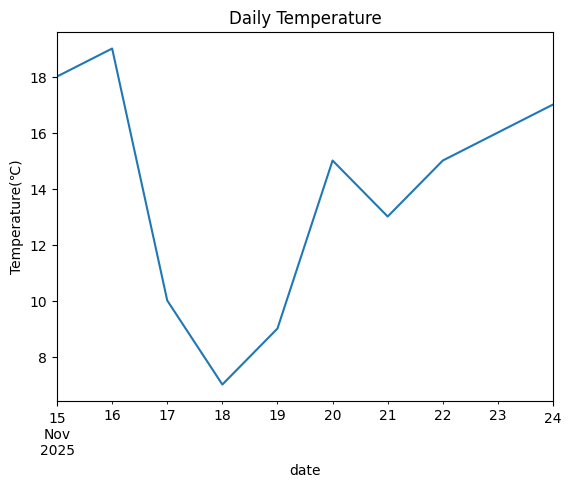

In [10]:
# pandas plot
# * plot(): DataFrame/Series 를 바로 시각화 해주는 함수
#     - kind: 그래프 종류. 'line', 'bar', 'box', 'pie' etc...
#     - title: 그래프 제목
#     - xlabel: x축 라벨, ylabel: y축 라벨

# 기온(temperature) 데이터를 시각화
df['temperature'].plot(title='Daily Temperature', ylabel='Temperature(℃)')

# => matplotlib 모듈 설치
#     > pip install matplotlib

<Axes: title={'center': 'Temperature with 3-day MA'}, xlabel='date', ylabel='T(℃)'>

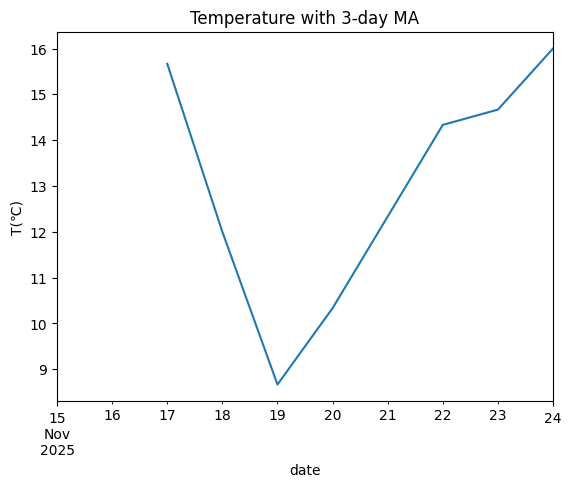

In [11]:
# 3일 이동평균 시각화
df['temperature'].rolling(3).mean().plot(title='Temperature with 3-day MA', ylabel='T(℃)')

<Axes: title={'center': 'Temperature & Humidity'}, xlabel='date'>

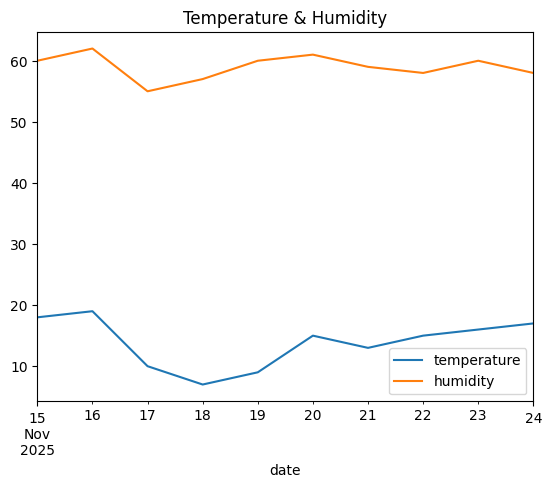

In [14]:
# 여러 컬럼 시각화
df[['temperature', 'humidity']].plot(title='Temperature & Humidity')

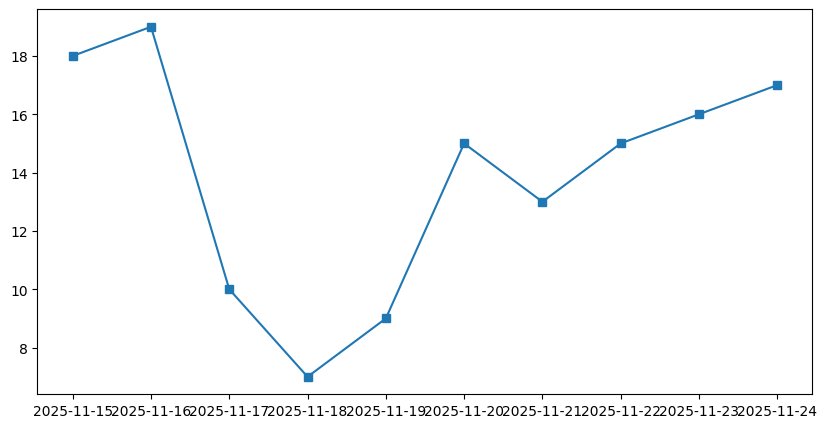

In [21]:
# matplotlib
# - 자유도가 높고, 세밀한 커스터마이징 가능
# - 코드가 길고, 처음 다루기에는 복잡할 수 있음

# import
import matplotlib.pyplot as plt

# Figure: 도화지
plt.figure(figsize=(10, 5))   # 가로 10, 세로 5 크기 지정하여 figure 생성

plt.plot(
  df.index,           # x축 데이터(날짜)
  df['temperature'],  # y축 데이터(온도)
  marker='s',         # 데이터 포인트 표시 모양('o' - 원)
  label='3-day MA'    # 범례
  )

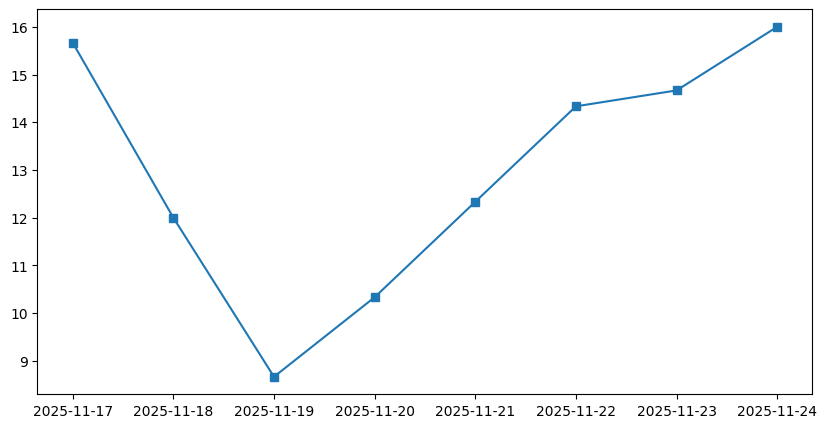

In [17]:
# 3일 이동평균 그래프 표시
plt.figure(figsize=(10, 5))

plt.plot(
  df.index,
  df['temperature'].rolling(3).mean(),
  marker='s',         # 포인트 모양('s' - 사각형)
  label='3-day MA')

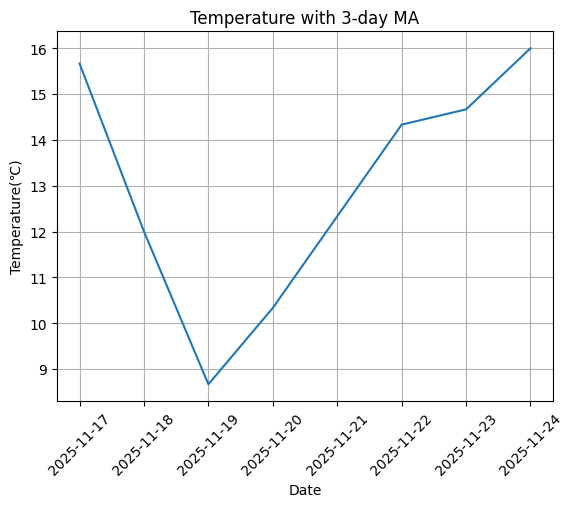

In [19]:
# 그래프 옵션 각각 설정하기

plt.plot(df.index, df['temperature'].rolling(3).mean())   # x, y축 데이터
plt.title('Temperature with 3-day MA')    # 그래프 제목
plt.xlabel('Date')                        # x축 라벨
plt.ylabel('Temperature(℃)')              # y축 라벨
plt.xticks(rotation=45)                   # x축 눈금 라벨 회전
plt.grid(True)                            # 격자 표시
plt.show()  # 그래프 표시

(array([20407., 20408., 20409., 20410., 20411., 20412., 20413., 20414.,
        20415., 20416.]),
 [Text(20407.0, 0, '2025-11-15'),
  Text(20408.0, 0, '2025-11-16'),
  Text(20409.0, 0, '2025-11-17'),
  Text(20410.0, 0, '2025-11-18'),
  Text(20411.0, 0, '2025-11-19'),
  Text(20412.0, 0, '2025-11-20'),
  Text(20413.0, 0, '2025-11-21'),
  Text(20414.0, 0, '2025-11-22'),
  Text(20415.0, 0, '2025-11-23'),
  Text(20416.0, 0, '2025-11-24')])

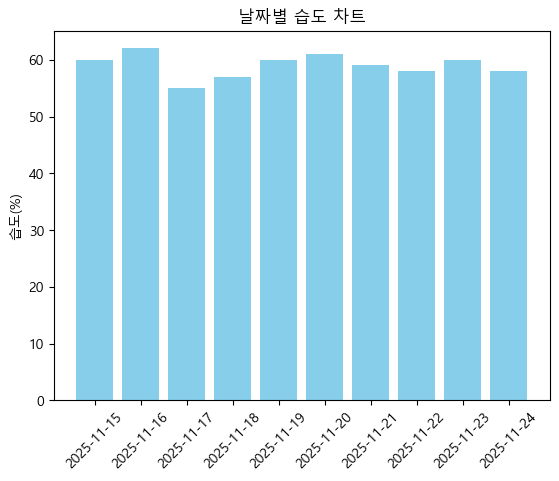

In [24]:
# 막대 그래프
# 폰트 설정 -> 한글 표시
plt.rc('font', family='Malgun Gothic')

plt.bar(
  df.index,       # x축 데이터(날짜)
  df['humidity'], # y축 데이터(습도)
  color='skyblue'    # 막대 색상
)
plt.title('날짜별 습도 차트')
plt.ylabel('습도(%)')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Temperature Line Chart')

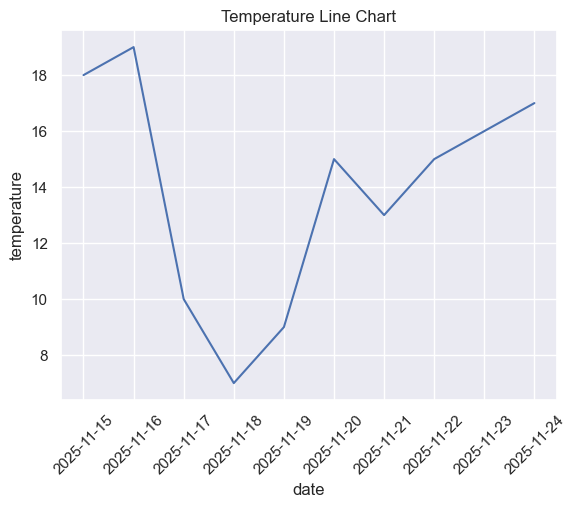

In [27]:
# seaborn
# - 통계적 시각화에 최적화 되어있는 라이브러리
# - 스타일 자동 적용 가능(테마)
# - 단, 세밀한 설정(커스터마이징)은 matplotlib을 활용함

# > pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# 스타일 설정
sns.set_theme(style='darkgrid')

# 선 그래프
sns.lineplot(x=df.index, y=df['temperature'])
plt.xticks(rotation=45)
plt.title('Temperature Line Chart')

<Axes: xlabel='Subject', ylabel='Score'>

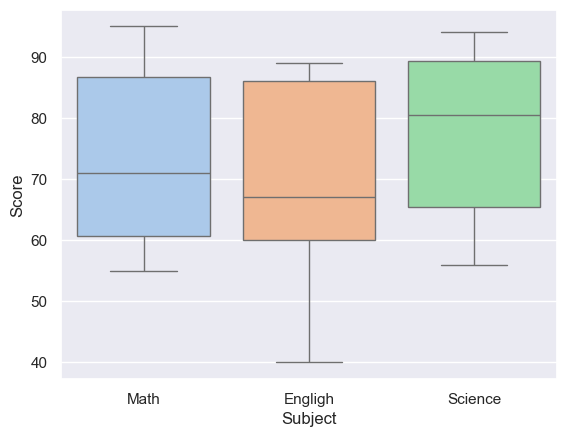

In [ ]:
'''
      * 박스플롯(Boxplot)
        : 데이터의 분포와 이상치를 하눈에 보여주는 그래프
        : 중앙값, 사분위수, 최소/최대값, 이상치를 시각적으로 확인
'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_box = pd.DataFrame(
  {
    "Math": np.random.randint(50, 100, 20).tolist(),
    "Engligh": np.random.randint(40, 90, 20).tolist(),
    "Science": np.random.randint(55, 95, 20).tolist(),
  }
)

# wide 형식의 데이터를 long 형식으로 변환 => melt
# - 각 컬럼의 값이 행 단위로 쌓이고, 변수 이름과 값이 각각 컬럼으로 만들어짐
df_box = df_box.melt(var_name='Subject', value_name='Score')

# melt(var_name, value_name)
# - var_name: 새로 만들어질' 변수 이름' 컬럼명
# - value_name: 새로 만들어질 '값' 컬럼명

sns.boxplot(data=df_box, x='Subject', y='Score', palette='pastel', hue='Subject')

<Axes: >

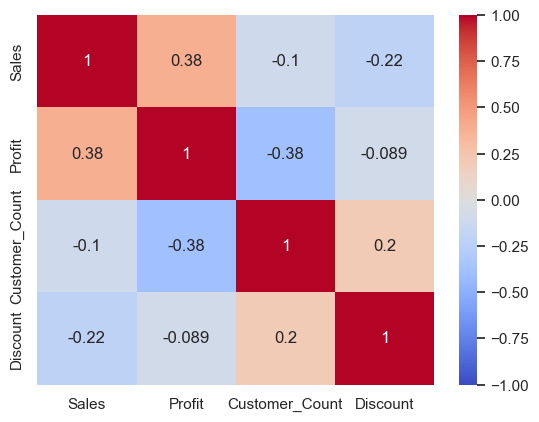

In [38]:
'''
    * 히트맵(Heatmap)
      : 값의 크기를 색상으로 표현하는 2차원 그래프
      : 상관관계를 시각화
'''


df_heat = pd.DataFrame(
  {
    "Sales": np.random.randint(100, 500, 15),
    "Profit": np.random.randint(20, 150, 15),
    "Customer_Count": np.random.randint(20, 200, 15),
    "Discount": np.random.randint(0, 50, 15),
  }
)

# * 컬럼 간 상관계수 계산 => corr()
#   - 상관계수: 두 변수 사이의 관계를 숫자로 나타낸 것
#   - 값 범위: -1 ~ 1 (1: 양의 상관, -1: 음의 상관, 0: 상관 없음)

df_heat = df_heat.corr()
# df_heat

sns.heatmap(data=df_heat, cmap='coolwarm', vmin=-1, vmax=1, annot=True)